# Pay on Default of Credit Card Clients Dataset
Johan David Marín Benjumea

## Data pipeline
---
---

### Load data
---

Como primer paso se cargan los datos directamente desde el [repositorio](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls) con el fin de evitar la dependencia de rutas. Para evitar garantizar el tipo correcto de cada tipo de variable, se hace uso de un diccionario con los metadatos de acuerdo a la información brindada por [UCI](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) en la descripción de la base de datos. Adicinalmente en los metadatos se agregan los niveles de las variables categoricas con el fin de utilizarlos en el análisis descriptivo y de esta forma facilitar la interpretación.

Adicionalemte se verifican y eliminan los registros repetidos, en este casou total de  3, se verifica que no hayan columnas coincidentes y se transforman los datos a tipo de dato más liviano posible ahorrando memoria RAM.

In [1]:
from src import DefaulerData

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
metadata_path = "metadata.yaml"

data = DefaulerData(url, metadata_path, 10000)

c:\Users\57318\Desktop\default-of-credit-card-clients\src\__init__.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.read_excel(str_url, header=1, index_col="ID", dtype=self.metadata["dtypes"]).rename(columns={'PAY_0': 'PAY_1'})
c:\Users\57318\Desktop\default-of-credit-card-clients\src\__init__.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.read_excel(str_url, header=1, index_col="ID", dtype=self.metadata["dtypes"]).rename(columns={'PAY_0': 'PAY_1'})
c:\Users\57318\Desktop\default-of-credit-card-clients\src\__init__.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.read_excel(str_url, header=1, index_col="ID", dtype=self.metadata["dtypes"

Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Shape of cleaned data: (9997, 24) - Remaining NAs: 0


Dropped rows: 3
     of which 3 duplicates. (Rows (first 150 shown): [10251, 15459, 15618])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.28 MB (-67.72%)



### Exploratory analysis
---

Puedes ver el análisis detallado [aquí]("C:\Users\57318\Desktop\default-of-credit-card-clients\original_report.html")

In [7]:
import src.exploratory as exp
df_plot = exp.dataframe_unanonimized(data.df, data.metadata)
# exp.generate_profiling_report(df_plot, data.metadata, "original_report.html")

#### Target

La variable `default payment next month`, es una varaible binaría tal y como se esperaba, no presenta ningún tipo de valor extraño, sin embargo muestra un desvalance entre las clases donde los default representan el $22.4%$ de los registros y los not-default el $77.6% restante.


#### Variables Categoricas

Los atributos `LIMIT_BAL`, `SEX` y `AGE` son coherentes con la descripción proporcionada en el repositorío de la UCI, las varaibles `EDUCATION` y `MARRIAGE` existen variables que no corresponden con los valores indicados. 

Para la variable `EDUCATION` se encuentran tres categorías no especificadas en la descripción del conjunto de datos; '0', '5' y '6', con un $0.1%$, $0.9%$ y $0.2%$ de lso resgistros respectivamente.

Mientras que para `MARRIAGE` se encuentra que un $0.2%$ de los registros corresponde a una categoría '0', que no corresponde a ninguna categoría descrita anteriormente.

Por otra parte se observó que exceptuando los valores extraños de la varaible `EDUCATION`; el valro '0', las variables categoricas no presentan diferencias muy grandes para los morosos.

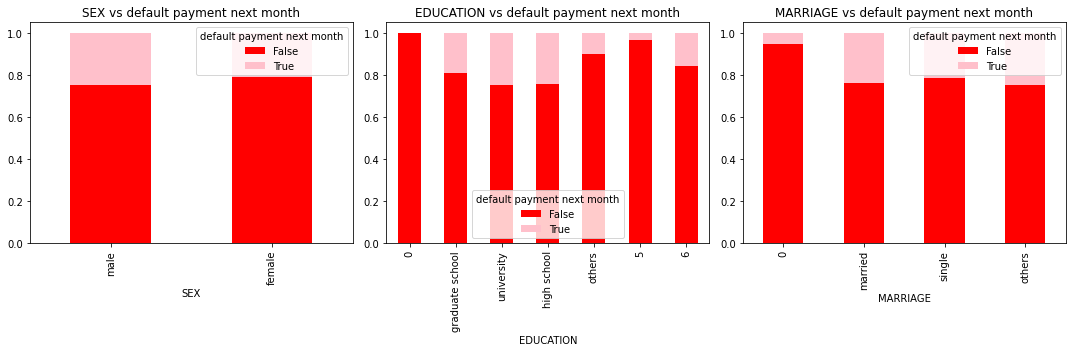

In [6]:
exp.visualize_stacked_barplots(df_plot, data.metadata["target"])

#### Variables númericas

En el análisis exploratorio se encontró que las variables `BILL_*` presentan una alta correlación entre ellas de la misma manera que ocurre entre las variables `PAY_*`.

En cuanto a los atributos `PAY_*`, todos estos atributos tienen un valor mínimo igual a $-2$ en un rango del $12%$ hasta el $16.4%$ de los registros, y un valor de $0$ en un $49%$ y un  $53.7%$, no incluidos en la descripción.


Se observó que en general estas variable no presentan distribuciojens normales y observando los boxplot que de manera individual no se evidencia una diferencia estadística significativa en los valores para mososos y no morosos.

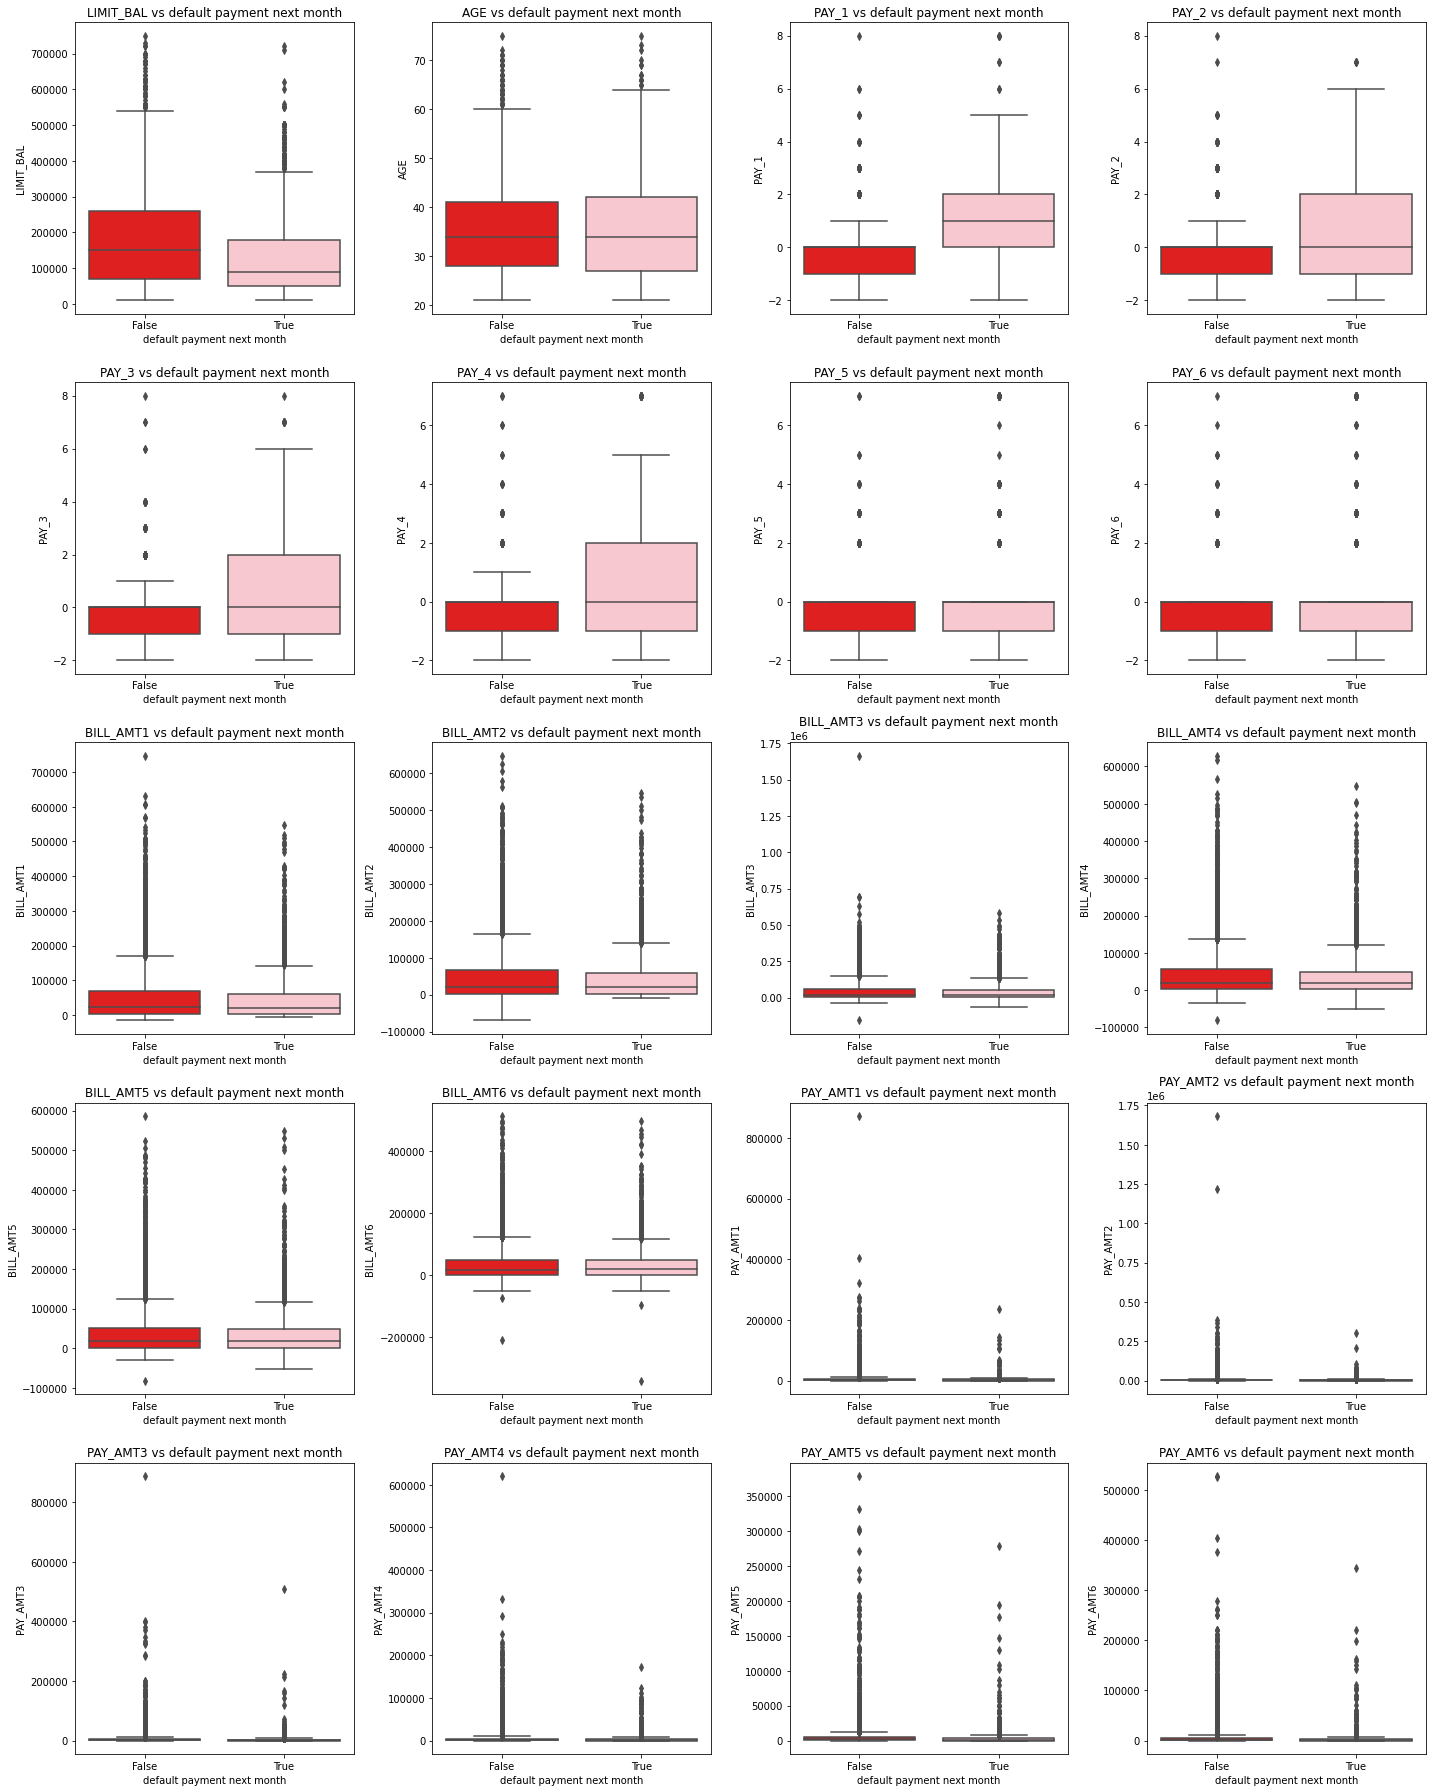

In [7]:
exp.visualize_boxplots(df_plot, data.metadata["target"])

### Limpieza de datos
---

En el caso de las variables categoricas se opta por realizar una eliminación de los registros con valores no correspondientes a lso descritos en el repositorio de datos. teniendo en cuenta que estas representan un pequeño porcentaje de los registros y de esta forma evitar afectar la calidad de los datos y posiblemente introducir valores atípicos. En total se eliminan $130$ filas correspondiente al $1.3 \%$ de los registros.


Para las variable númericas debido a los porcentajes tan altos que presentan los valores extraños, y a que la eliminación de valores atípicos por el métodeo de $z-score$, ne presenta un cambio significativo sobre la asimetría de las variables y data la naturaleza del problema por otra parte dada la naturaleza del problema, en el cual es de vital importancia detectar los morosos a tiempo, se decide no realizar la eliminación de valores atípicos, detectados.

En una versión posterior del modelo, podría hacerse uso de un metodo como isolation tree, para verificar el efecto de estos valores atípicos

In [2]:
print(f"Shape before remove estrangles values in categorical variables{data.df.shape}")
data.cleasing_data()
print(f"Shape after remove estrangles values in categorical variables{data.df.shape}")

Shape before remove estrangles values in categorical variables(9997, 24)
Shape after remove estrangles values in categorical variables(9867, 24)


LIMIT_BAL have a 0.4662004662004662 % outliers


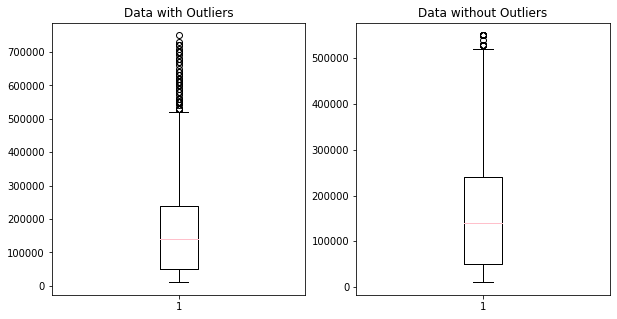

AGE have a 0.5270092226613966 % outliers


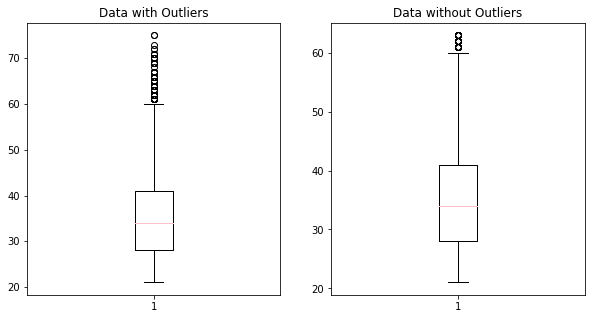

PAY_1 have a 0.4662004662004662 % outliers


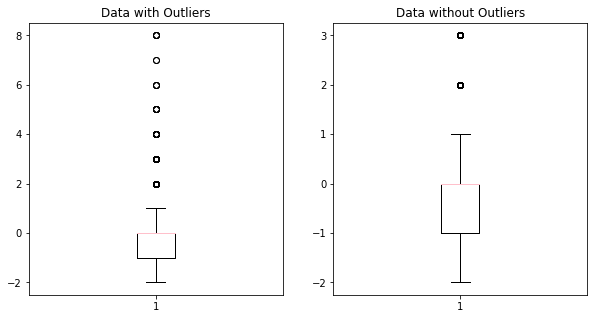

PAY_2 have a 0.4763352589439546 % outliers


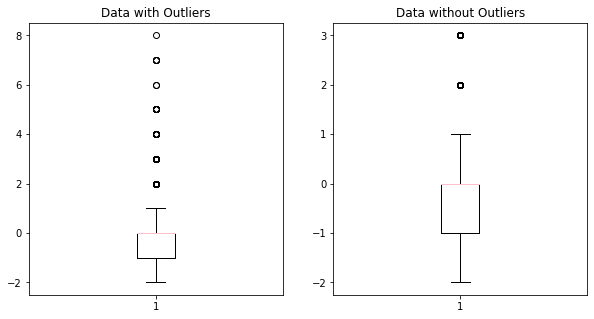

PAY_3 have a 0.4763352589439546 % outliers


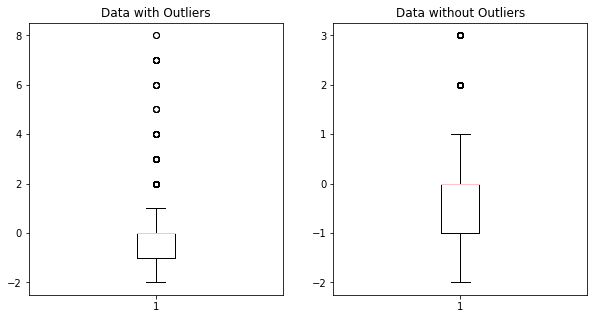

PAY_4 have a 0.4966048444309314 % outliers


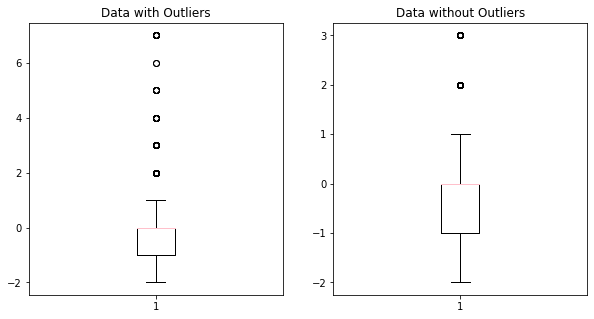

PAY_5 have a 0.5168744299179082 % outliers


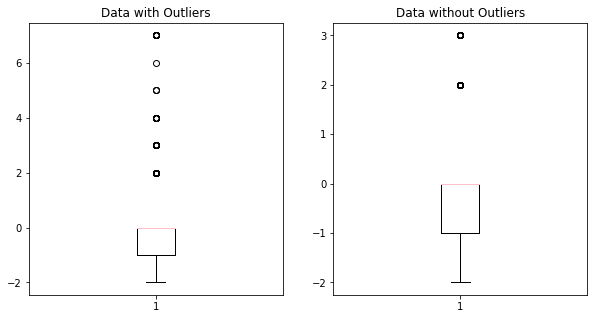

PAY_6 have a 0.4763352589439546 % outliers


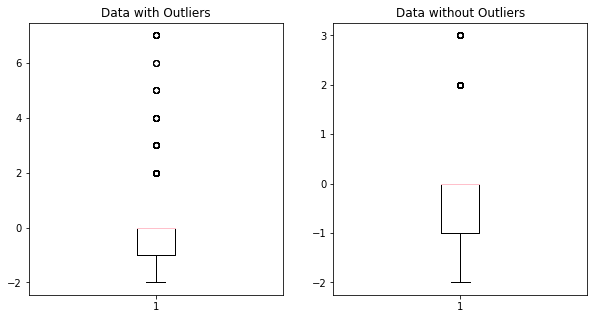

BILL_AMT1 have a 2.300597952771866 % outliers


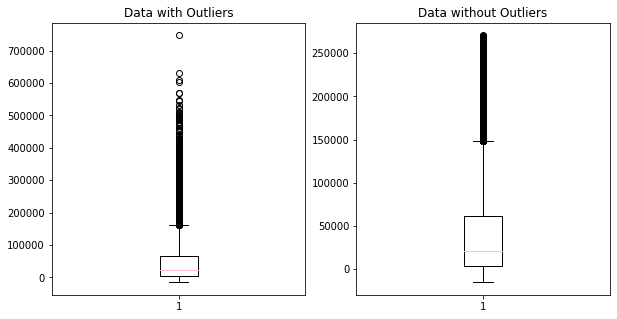

BILL_AMT2 have a 2.249923989054424 % outliers


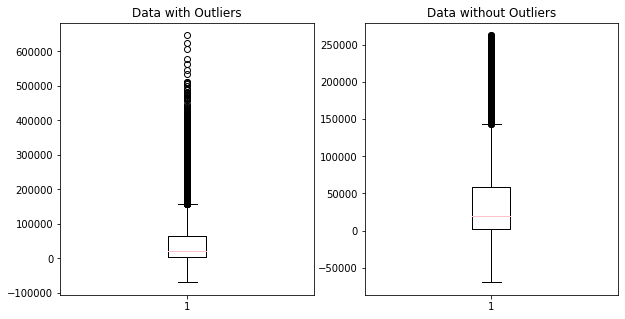

BILL_AMT3 have a 2.067497719671633 % outliers


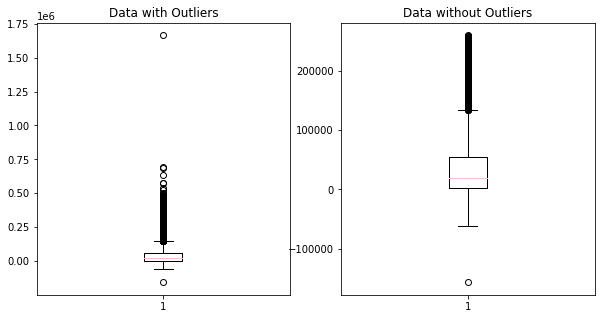

BILL_AMT4 have a 2.168845647106517 % outliers


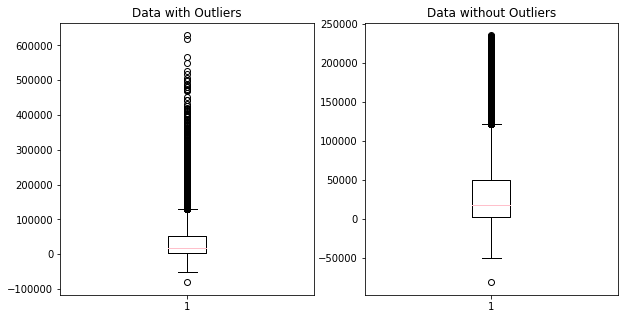

BILL_AMT5 have a 2.0573629269281444 % outliers


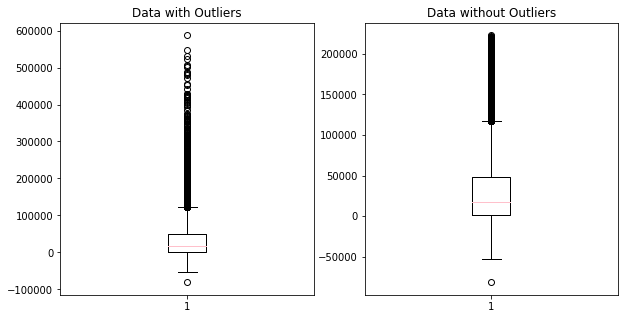

BILL_AMT6 have a 2.1384412688760515 % outliers


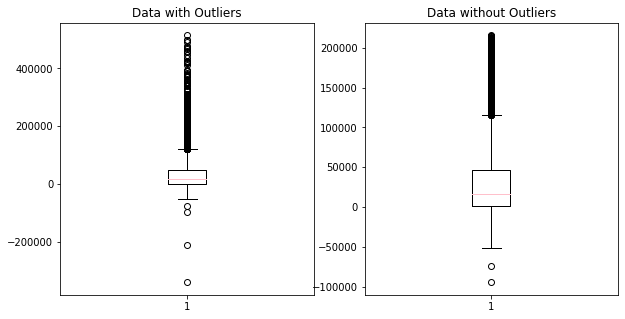

PAY_AMT1 have a 1.2668490929360494 % outliers


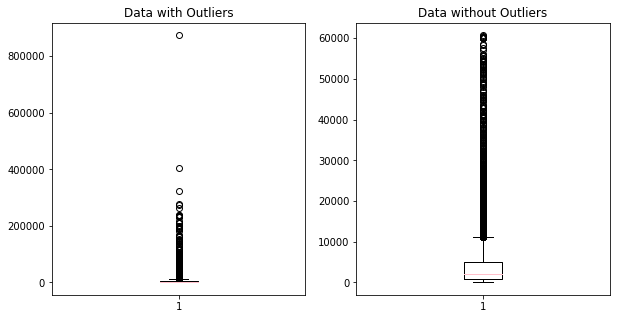

PAY_AMT2 have a 0.7803790412486065 % outliers


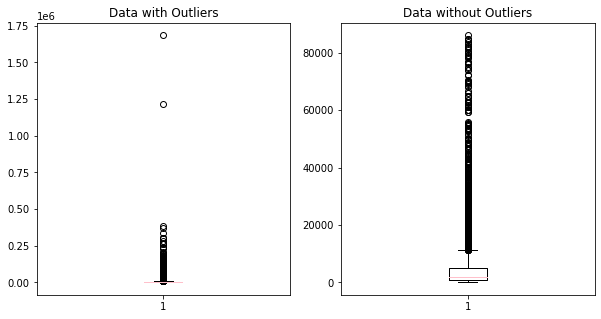

PAY_AMT3 have a 1.07428803080977 % outliers


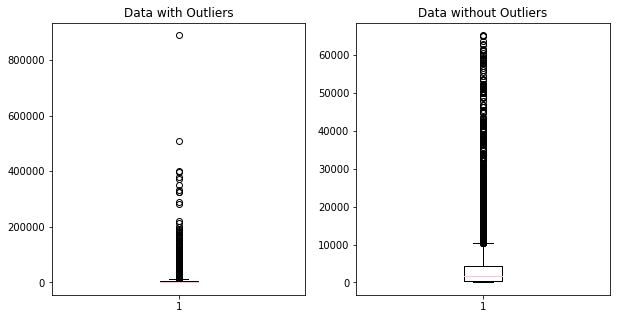

PAY_AMT4 have a 1.408736191344887 % outliers


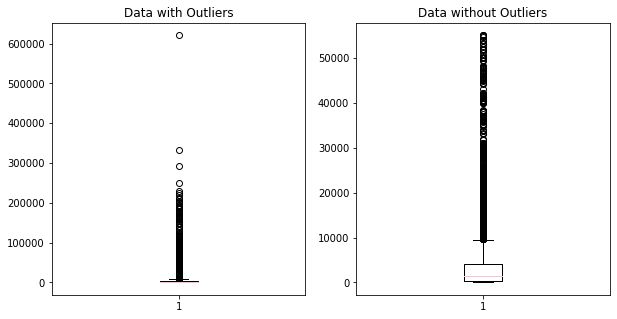

PAY_AMT5 have a 1.3479274348839565 % outliers


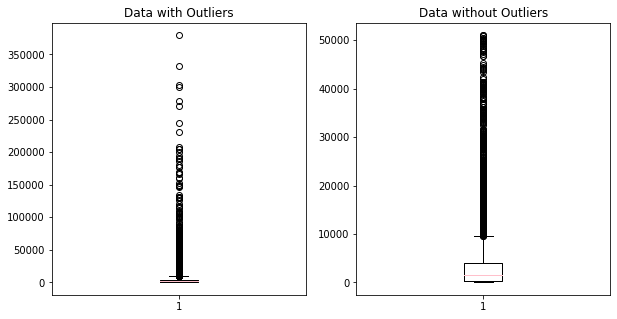

PAY_AMT6 have a 1.3783318131144218 % outliers


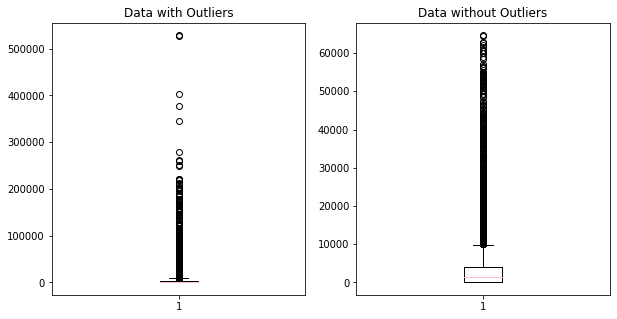

In [9]:
exp.analize_outliers_zscore(data.df)

### Ingeniería de Características
---

#### Variables Númericas

Debido a la correlación observada entre varias de las variables númericas y teniendo en cuenta las diferencias entre las varaibles con sigo mismas (se evicdencia en la asimetría), se propone construir dos nuevas variables relativas, porgentaje adeudado y porcentaje pagado.

$$PER\_BILL = \frac{BILL\_AMT}{LIMIT\_BAL}$$
$$PER\_PAY = \frac{PAY\_AMT}{LIMIT\_BAL}$$


Además de esto es posible que parte se observó una correlación alta entre las variables `PAY_2` hasta `PAY_6`, mayor a la correlación de las demás variables por lo que se propone una nueva variable, en este caso la tendencia entre estas varaibles.


$$slope = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

Finalmente para evitar que la diferencia de escala entre las variables pueda afectar el modelo, se realiza un escalamiento de todas las variables númericas.


#### Variables Categoricas

Teniendo en cuenta los pocos niveles que poseen todas las variables categoricas se hace uso de one hotencoding


In [3]:
data.build_features()
data.train_scaler()

Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Shape of cleaned data: (9867, 37) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.57 MB (-54.9%)



In [8]:
df_plot = exp.dataframe_unanonimized(data.df, data.metadata)
# exp.generate_profiling_report(df_plot, data.metadata, "clean_report.html")
del(df_plot)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Finalmente se guardan los datos en un archivo *data_model.csv* para hacer uso de estos en el modelo.

In [12]:

data.encoding_catagories()
data.save_columns()
data.save_data()

## Model pipeline
---
---


In [1]:
from pathlib import Path

In [ ]:
file = "C:/Users/57318/Desktop/default-of-credit-card-clients/data_model.csv"